# 5. Gender and Behaviour

In [120]:
from sys import dont_write_bytecode

import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
import utilityFunctions.genderStats as utils

In [121]:
df = pd.read_feather("./data/averaged.feather")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 5089
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Gender_Student                                3875 non-null   category
 1   Lang_Spoken_Home                              3875 non-null   category
 2   Books_Home                                    3875 non-null   category
 3   Own_Computer                                  3875 non-null   category
 4   Shared_Computer                               3875 non-null   category
 5   Smartphone                                    3875 non-null   category
 6   Internet_Access                               3875 non-null   category
 7   Study_Desk                                    3875 non-null   category
 8   Own_Room                                      3875 non-null   category
 9   ParentA_Edu_Level                             3875 non-nu

# 5.1 Disorderly Behaviour and Gender

In [122]:
disorderly_mask = df.columns.str.contains("Disorderly")
df[df.columns[disorderly_mask]].value_counts()

Disorderly_Behavior_during_Math_Lessons  Disorderly_Behavior_during_Science_Lessons
Some Lessons                             Some Lessons                                  1248
Few or No Lessons                        Few or No Lessons                              809
Some Lessons                             Few or No Lessons                              649
Few or No Lessons                        Some Lessons                                   571
Most Lessons                             Some Lessons                                   185
Some Lessons                             Most Lessons                                   162
Most Lessons                             Most Lessons                                   106
                                         Few or No Lessons                               84
Few or No Lessons                        Most Lessons                                    61
Name: count, dtype: int64

In [123]:
df["Disorderly_Behavior_during_Math_Lessons"] = df["Disorderly_Behavior_during_Math_Lessons"].apply(lambda x: "Few Lessons" if "Few" in str(x) else x )
df["Disorderly_Behavior_during_Math_Lessons"] = df["Disorderly_Behavior_during_Math_Lessons"].apply(lambda x: "Most Lessons" if "Most" in str(x) else x )
df["Disorderly_Behavior_during_Math_Lessons"] = df["Disorderly_Behavior_during_Math_Lessons"].apply(lambda x: "Some Lessons" if "Some" in str(x) else x )
df["Disorderly_Behavior_during_Math_Lessons"].value_counts()

Disorderly_Behavior_during_Math_Lessons
Some Lessons    2059
Few Lessons     1441
Most Lessons     375
Name: count, dtype: int64

In [124]:
df["Disorderly_Behavior_during_Math_Lessons"]  = pd.Categorical(df["Disorderly_Behavior_during_Math_Lessons"] ,ordered=True, categories=["Few Lessons", "Some Lessons", "Most Lessons"])



In [125]:
df["Disorderly_Behavior_during_Science_Lessons"] = df["Disorderly_Behavior_during_Science_Lessons"].apply(lambda x: "Few Lessons" if "Few" in str(x) else x )
df["Disorderly_Behavior_during_Science_Lessons"] = df["Disorderly_Behavior_during_Science_Lessons"].apply(lambda x: "Most Lessons" if "Most" in str(x) else x )
df["Disorderly_Behavior_during_Science_Lessons"] = df["Disorderly_Behavior_during_Science_Lessons"].apply(lambda x: "Some Lessons" if "Some" in str(x) else x )
df["Disorderly_Behavior_during_Science_Lessons"].value_counts()

Disorderly_Behavior_during_Science_Lessons
Some Lessons    2004
Few Lessons     1542
Most Lessons     329
Name: count, dtype: int64

In [126]:
df["Disorderly_Behavior_during_Science_Lessons"]  = pd.Categorical(df["Disorderly_Behavior_during_Math_Lessons"] ,ordered=True, categories=["Few Lessons", "Some Lessons", "Most Lessons"])



### 5.1.1 Gender and Disorderly Behaviour in Math Classes

#### 5.1.1.1 Gender wise distribution of Pupils having frequent disorderly behaviour

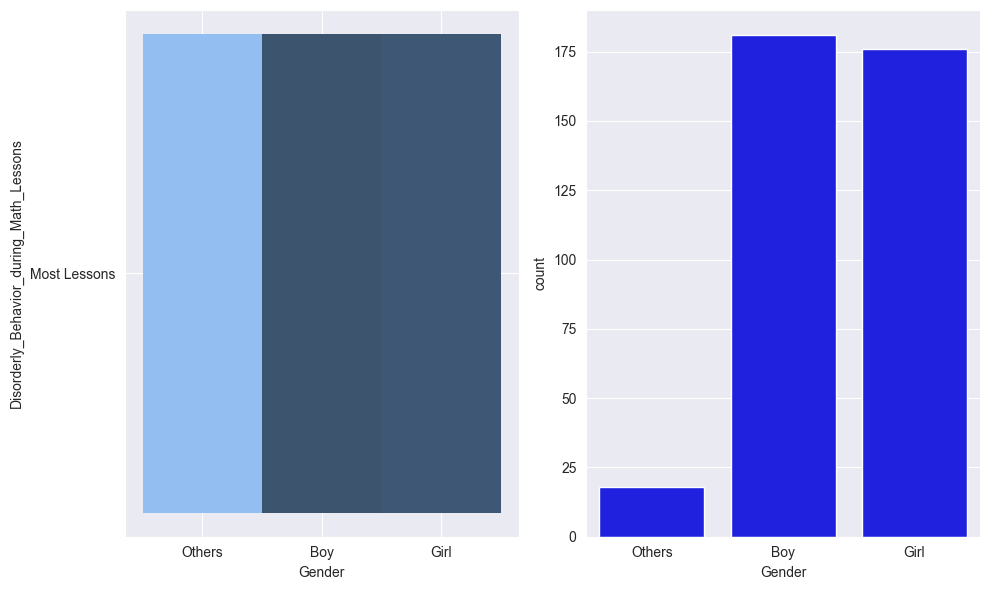

,count,unique,top,freq
Gender_Student,,,,
Others,18,1,Others,18
Boy,181,1,Boy,181
Girl,176,1,Girl,176


In [127]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Math", "Most")
math_grouped.describe()

#### 5.1.1.2 Gender wise distribution of Pupils having some disorderly behaviour

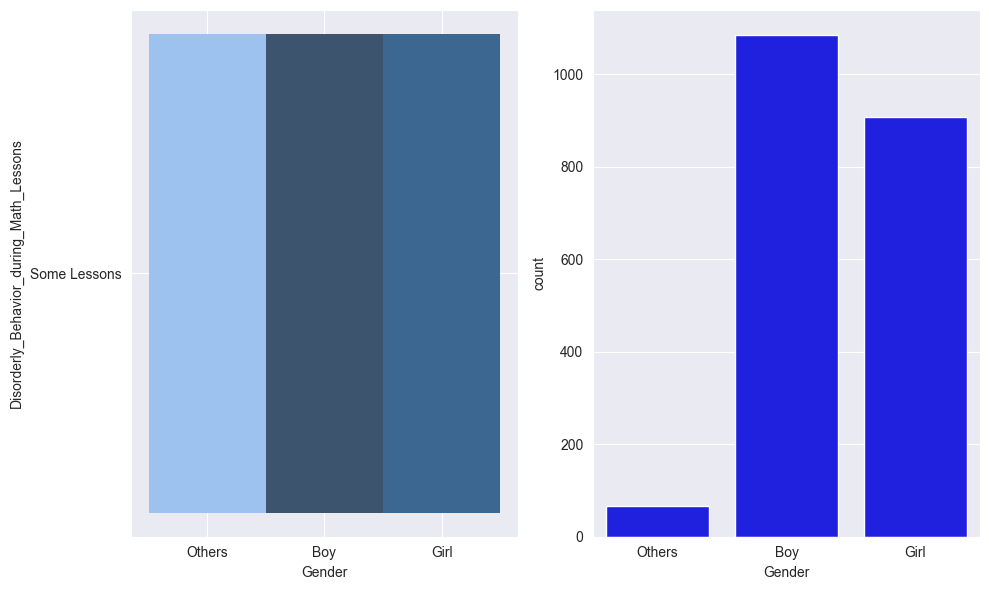

,count,unique,top,freq
Gender_Student,,,,
Others,67,1,Others,67
Boy,1085,1,Boy,1085
Girl,907,1,Girl,907


In [128]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Math", "Some")
math_grouped.describe()

#### 5.1.1.3 Gender wise distribution of Pupils having few disorderly behaviour

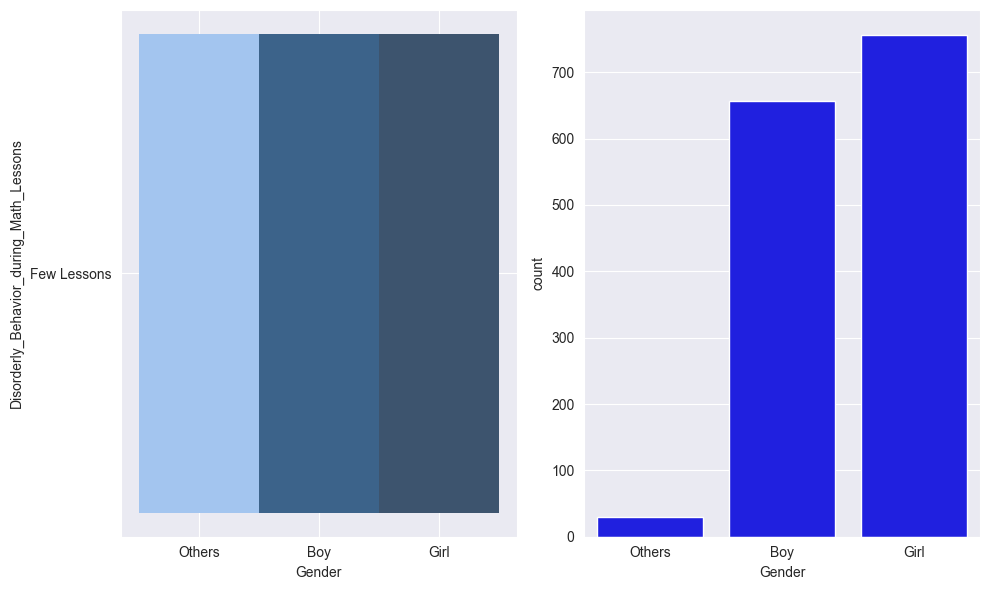

,count,unique,top,freq
Gender_Student,,,,
Others,29,1,Others,29
Boy,656,1,Boy,656
Girl,756,1,Girl,756


In [129]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Math", "Few")
math_grouped.describe()

### 5.1.2 Gender and Disorderly Behaviour in Science Classes

#### 5.1.2.1 Gender wise distribution of Pupils having frequent disorderly behaviour

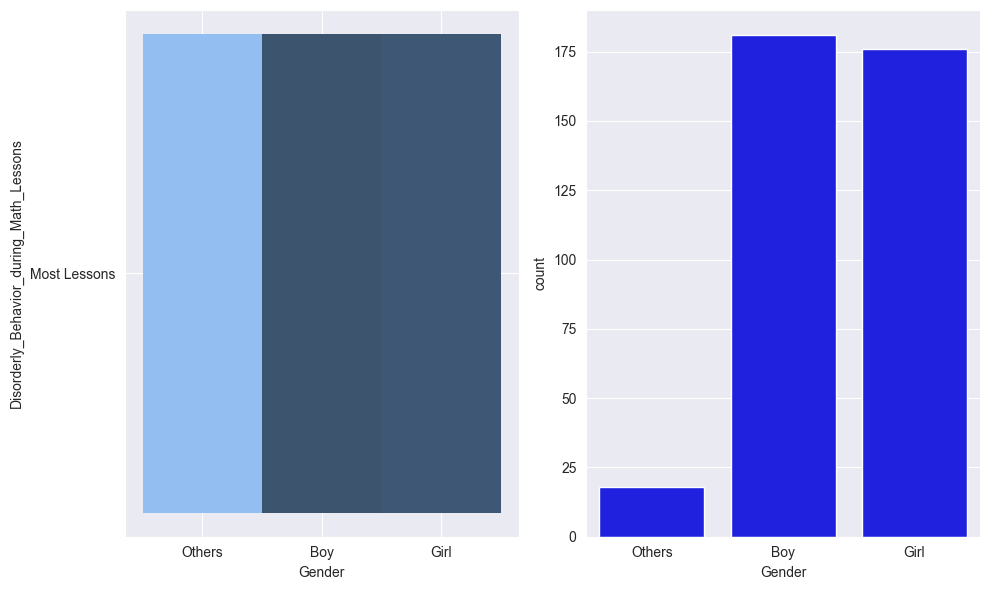

,count,unique,top,freq
Gender_Student,,,,
Others,18,1,Others,18
Boy,181,1,Boy,181
Girl,176,1,Girl,176


In [130]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Math", "Most")
math_grouped.describe()

#### 5.1.2.2 Gender wise distribution of Pupils having some disorderly behaviour

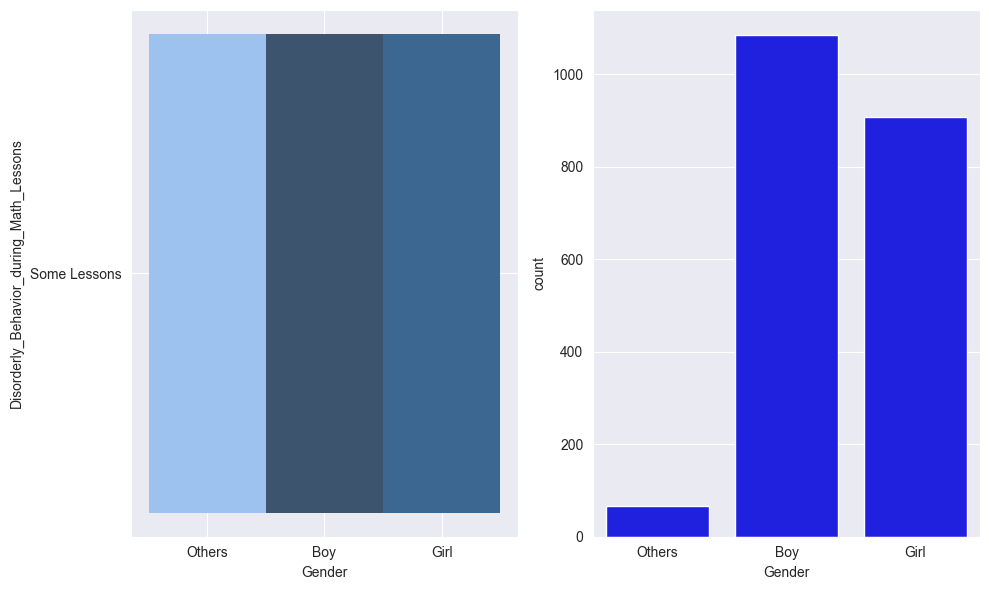

,count,unique,top,freq
Gender_Student,,,,
Others,67,1,Others,67
Boy,1085,1,Boy,1085
Girl,907,1,Girl,907


In [131]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Math", "Some")
math_grouped.describe()


#### 5.1.2.3 Gender wise distribution of Pupils having few disorderly behaviour

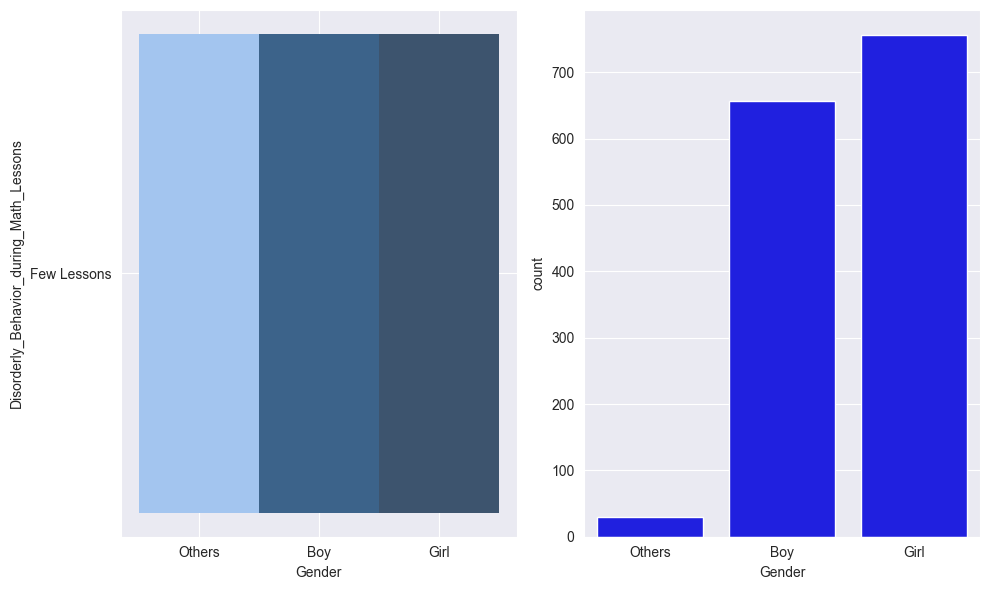

,count,unique,top,freq
Gender_Student,,,,
Others,29,1,Others,29
Boy,656,1,Boy,656
Girl,756,1,Girl,756


In [132]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Math", "Few")
math_grouped.describe()

### 5.1.3 Gender and  Overall Disorderly Behaviour

In [133]:
science_most = df["Disorderly_Behavior_during_Science_Lessons"].str.contains("Most")
maths_most = df["Disorderly_Behavior_during_Math_Lessons"].str.contains("Most")
science_few = df["Disorderly_Behavior_during_Science_Lessons"].str.contains("Few")
maths_few = df["Disorderly_Behavior_during_Math_Lessons"].str.contains("Few")



#### 5.1.3.1 Gender wise distribution of students having frequent disorderly behavior across subjects

In [134]:
most_disorderly = df[science_most & maths_most]
most_disorderly.describe()


,1ST_PV_MATHEMATICS,2ND_PV_MATHEMATICS,3RD_PV_MATHEMATICS,4TH_PV_MATHEMATICS,5TH_PV_MATHEMATICS,1ST_PV_SCIENCE,2ND_PV_SCIENCE,3RD_PV_SCIENCE,4TH_PV_SCIENCE,5TH_PV_SCIENCE,...,2ND_PV_EARTH_SCIENCE,3RD_PV_EARTH_SCIENCE,4TH_PV_EARTH_SCIENCE,5TH_PV_EARTH_SCIENCE,AVERAGE_PV_SCIENCE,AVERAGE_PV_MATHEMATICS,AVERAGE_PV_BIOLOGY,AVERAGE_PV_CHEMISTRY,AVERAGE_PV_PHYSICS,AVERAGE_PV_EARTH_SCIENCE
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,504.957021,507.967439,507.430038,506.996353,507.643269,517.395550,519.363338,519.677339,521.794787,520.595490,...,522.570258,527.288851,524.217921,523.628670,519.765301,506.998824,519.214729,521.885680,511.457032,525.502349
std,72.076804,75.277862,73.323459,73.151227,75.047655,78.341466,82.896807,78.756068,82.635062,81.783305,...,82.414376,82.044059,82.434559,82.963126,77.146383,70.588357,82.494197,75.013464,81.504871,76.942052
min,321.690010,301.721470,323.701920,283.797580,285.025620,304.615810,262.684720,317.678650,298.899250,255.672900,...,235.014930,290.635780,210.880330,270.262330,303.699012,307.604440,308.626900,297.973606,282.453055,292.409028
25%,455.359065,460.015970,452.324495,458.439780,460.272860,460.427845,460.316145,467.059685,466.915120,474.173365,...,468.228840,475.336215,473.000775,469.248200,470.595295,458.082107,461.747890,470.247034,460.909382,480.328878
50%,510.570510,513.028050,512.592640,514.228300,509.982280,521.247920,522.164860,517.497900,523.824920,521.985970,...,528.833000,528.348630,526.261000,526.473480,524.729316,513.948918,517.475674,528.181114,515.585190,526.524528
75%,552.367395,560.164180,559.478110,556.733855,554.698950,567.452510,574.304715,576.266705,578.417630,580.651740,...,579.652880,580.879850,579.092665,572.122050,573.453676,555.179755,580.084199,571.597758,568.080555,581.454334
max,709.089030,740.147210,697.746350,704.066950,736.804680,741.083230,737.233290,756.094360,732.127710,724.134910,...,717.989830,742.065030,718.222080,737.258580,697.753074,687.338924,721.367310,712.031484,704.573155,700.483012


In [135]:
most_disorderly.groupby("Gender_Student", observed=False)["Gender_Student"].describe()

,count,unique,top,freq
Gender_Student,,,,
Others,18,1,Others,18
Boy,181,1,Boy,181
Girl,176,1,Girl,176


##### 5.1.3.1.1 Percentage of boys exhibiting frequent disorderly behaviour

In [136]:
perc_boys = most_disorderly[most_disorderly["Gender_Student"].str.contains("Boy")]["Gender_Student"].count() / df[df["Gender_Student"].str.contains("Boy")]["Gender_Student"].count()
perc_boys * 100

np.float64(9.417273673257023)

##### 5.1.3.1.2 Percentage of girls exhibiting frequent disorderly behaviour

In [137]:
perc_boys = most_disorderly[most_disorderly["Gender_Student"].str.contains("Girl")]["Gender_Student"].count() / df[df["Gender_Student"].str.contains("Girl")]["Gender_Student"].count()
perc_boys * 100

np.float64(9.57041870581838)

#### 5.1.3.2 Gender wise distribution of students having very few disorderly behavior across subjects

In [138]:
few_disorderly = df[science_few & maths_few]

In [139]:
few_disorderly.groupby("Gender_Student")["Gender_Student"].describe()

C:\Users\ssree\AppData\Local\Temp\ipykernel_11824\1123985767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  few_disorderly.groupby("Gender_Student")["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,29,1,Others,29
Boy,656,1,Boy,656
Girl,756,1,Girl,756



##### 5.1.3.2.1 Percentage of boys exhibiting fewer disorderly behaviour

In [140]:
perc_boys = few_disorderly[few_disorderly["Gender_Student"].str.contains("Boy")]["Gender_Student"].count() / df[df["Gender_Student"].str.contains("Boy")]["Gender_Student"].count()
perc_boys * 100

np.float64(34.13111342351717)


##### 5.1.3.2.2 Percentage of girls exhibiting fewer disorderly behaviour

In [141]:
perc_boys = most_disorderly[most_disorderly["Gender_Student"].str.contains("Girl")]["Gender_Student"].count() / df[df["Gender_Student"].str.contains("Girl")]["Gender_Student"].count()
perc_boys * 100

np.float64(9.57041870581838)

## 5.2 Subject Likeness and Gender

In [142]:
subject_likeness_mask = df.columns.str.contains("Like_Learning")
df[df.columns[subject_likeness_mask]].value_counts()

Students_Like_Learning_Mathematics   Students_Like_Learning_Science 
Do Not Like Learning Mathematics     Do Not Like Learning Science       945
                                     Somewhat Like Learning Science     806
Somewhat Like Learning Mathematics   Somewhat Like Learning Science     520
Do Not Like Learning Mathematics     Very Much Like Learning Science    468
Somewhat Like Learning Mathematics   Very Much Like Learning Science    384
                                     Do Not Like Learning Science       334
Very Much Like Learning Mathematics  Very Much Like Learning Science    195
                                     Somewhat Like Learning Science     147
                                     Do Not Like Learning Science        76
Name: count, dtype: int64

In [143]:
df["Students_Like_Learning_Mathematics"] = df["Students_Like_Learning_Mathematics"].apply(lambda x: "Do not like" if "Do Not" in str(x) else x )
df["Students_Like_Learning_Mathematics"] = df["Students_Like_Learning_Mathematics"].apply(lambda x: "Some what like" if "Somewhat" in str(x) else x )
df["Students_Like_Learning_Mathematics"] = df["Students_Like_Learning_Mathematics"].apply(lambda x: "Very much like" if "Very Much" in str(x) else x )
df["Students_Like_Learning_Mathematics"].value_counts()



Students_Like_Learning_Mathematics
Do not like       2219
Some what like    1238
Very much like     418
Name: count, dtype: int64

In [144]:
df["Students_Like_Learning_Science"] = df["Students_Like_Learning_Science"].apply(lambda x: "Do not like" if "Do Not" in str(x) else x )
df["Students_Like_Learning_Science"] = df["Students_Like_Learning_Science"].apply(lambda x: "Some what like" if "Somewhat" in str(x) else x )
df["Students_Like_Learning_Science"] = df["Students_Like_Learning_Science"].apply(lambda x: "Very much like" if "Very Much" in str(x) else x )
df["Students_Like_Learning_Science"].value_counts()



Students_Like_Learning_Science
Some what like    1473
Do not like       1355
Very much like    1047
Name: count, dtype: int64

### 5.2.1 Gender and Likeness for Mathematics

#### 5.2.1.1 Gender wise distribution of students who like Mathematics

In [145]:
ver_much_like = df["Students_Like_Learning_Mathematics"].str.contains("Very")
some_what_like = df["Students_Like_Learning_Mathematics"].str.contains("Some")
like_maths  = df[ver_much_like | some_what_like]
like_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,46,1,Others,46
Boy,887,1,Boy,887
Girl,723,1,Girl,723


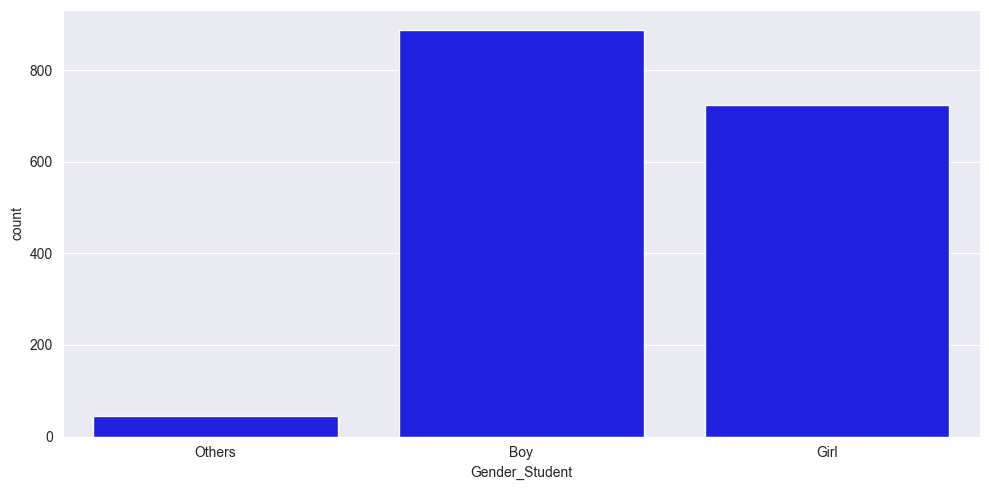

In [146]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=like_maths, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()

##### 5.2.1.1.1 Percentage of boys, who like mathematics

In [147]:
utils.getPercentageByGender(like_maths,df,"Boy")

0.4614984391259105


##### 5.2.1.1.2 Percentage of girls, who like mathematics

In [148]:
utils.getPercentageByGender(like_maths,df,"Girl")

0.3931484502446982


#### 5.2.1.2 Gender wise distribution of students who do not like Mathematics

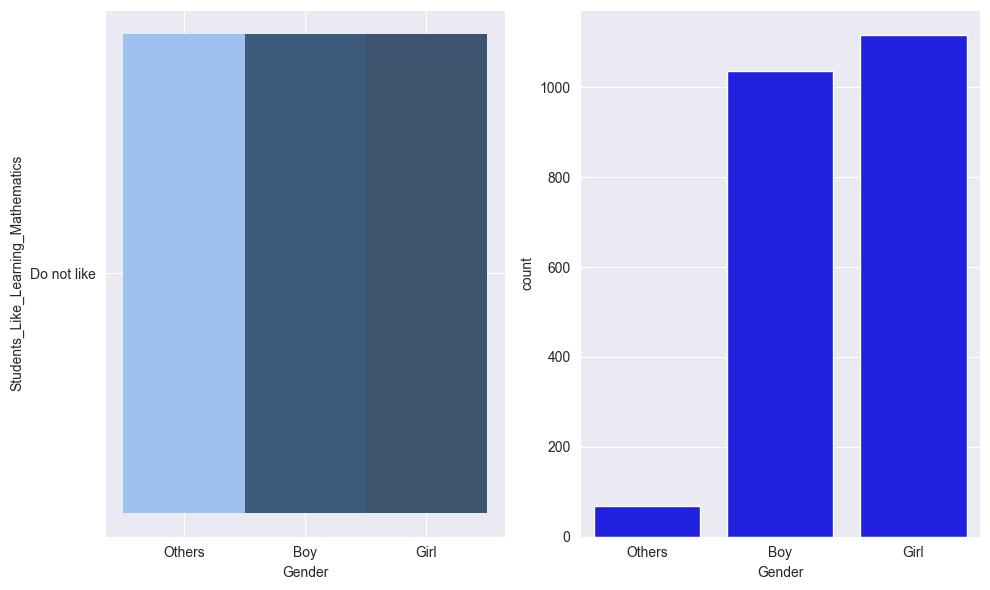

,Gender_Student,Lang_Spoken_Home,Books_Home,Own_Computer,Shared_Computer,Smartphone,Internet_Access,Study_Desk,Own_Room,ParentA_Edu_Level,...,Students_Value_Science,Digital_Self_Efficacy,Disorderly_Behavior_during_Science_Lessons,Students_Value_Environmental_Preservation,AVERAGE_PV_SCIENCE,AVERAGE_PV_MATHEMATICS,AVERAGE_PV_BIOLOGY,AVERAGE_PV_CHEMISTRY,AVERAGE_PV_PHYSICS,AVERAGE_PV_EARTH_SCIENCE
0,Girl,Sometimes,One Book Case,Yes,Yes,Yes,Yes,Yes,Yes,I don’t know,...,Strongly Value Science,High Digital Self-Efficacy,Some Lessons,Strongly Value,646.737090,617.370980,621.484356,629.224984,604.773000,592.261964
1,Girl,Sometimes,One Book Case,Yes,Yes,Yes,Yes,Yes,Yes,I don’t know,...,Somewhat Value Science,High Digital Self-Efficacy,Some Lessons,Strongly Value,575.796714,526.669736,536.705586,620.597004,575.948448,596.971438
2,Girl,Almost always,One Book Case,Yes,No,Yes,Yes,Yes,Yes,I don’t know,...,Strongly Value Science,High Digital Self-Efficacy,Some Lessons,Very Strongly Value,544.337234,496.228622,563.870548,529.335138,493.620340,497.036416
4,Others,Almost always,One Book Case,Yes,Yes,Yes,Yes,Yes,Yes,<Upper secondary education—ISCED Level 3>,...,Strongly Value Science,High Digital Self-Efficacy,Some Lessons,Very Strongly Value,553.328876,512.365232,537.317922,544.287360,531.582183,566.663730
5,Girl,Always,One Book Case,Yes,Yes,Yes,Yes,Yes,Yes,<Upper secondary education—ISCED Level 3>,...,Do Not Value Science,High Digital Self-Efficacy,Some Lessons,Very Strongly Value,507.999488,480.515014,521.578806,515.389704,521.796587,510.857384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5076,Boy,Almost always,More than two bookcases,Yes,Yes,Yes,Yes,Yes,Yes,I don’t know,...,Do Not Value Science,Medium Digital Self-Efficacy,Some Lessons,Strongly Value,563.522256,563.840346,577.376610,605.933812,578.129028,585.769956
5078,Girl,Always,Two Book Cases,Yes,No,Yes,Yes,Yes,Yes,I don’t know,...,Somewhat Value Science,High Digital Self-Efficacy,Some Lessons,Strongly Value,522.176480,507.862110,530.681208,494.987954,507.845203,552.619188
5080,Girl,Almost always,Two Book Cases,Yes,Yes,Yes,Yes,No,Yes,I don’t know,...,Somewhat Value Science,Medium Digital Self-Efficacy,Few Lessons,Very Strongly Value,629.605738,597.979224,641.984574,738.854870,617.042255,629.178072
5083,Boy,Sometimes,Two Book Cases,Yes,Yes,Yes,Yes,Yes,Yes,I don’t know,...,Do Not Value Science,High Digital Self-Efficacy,Some Lessons,Very Strongly Value,646.945754,624.863504,631.829872,630.396432,626.257028,678.994776


In [149]:
dont_like_maths, gender_groped = utils.subjectLikeness(df,"Mathematics", "Do not")
dont_like_maths

##### 5.2.1.2.1 Percentage of boys, do not like mathematics

In [150]:
utils.getPercentageByGender(dont_like_maths,df,"Boy")

0.5385015608740895


##### 5.2.1.2.2 Percentage of girls, do not like mathematics

In [151]:
utils.getPercentageByGender(dont_like_maths,df,"Girl")

0.6068515497553018


### 5.2.2 Gender and Likeness for Science

#### 5.2.2.1 Gender wise distriibution of students who like Science

In [152]:
ver_much_like = df["Students_Like_Learning_Science"].str.contains("Very")
some_what_like = df["Students_Like_Learning_Science"].str.contains("Some")
like_science  = df[ver_much_like | some_what_like]
like_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,77,1,Others,77
Boy,1305,1,Boy,1305
Girl,1138,1,Girl,1138


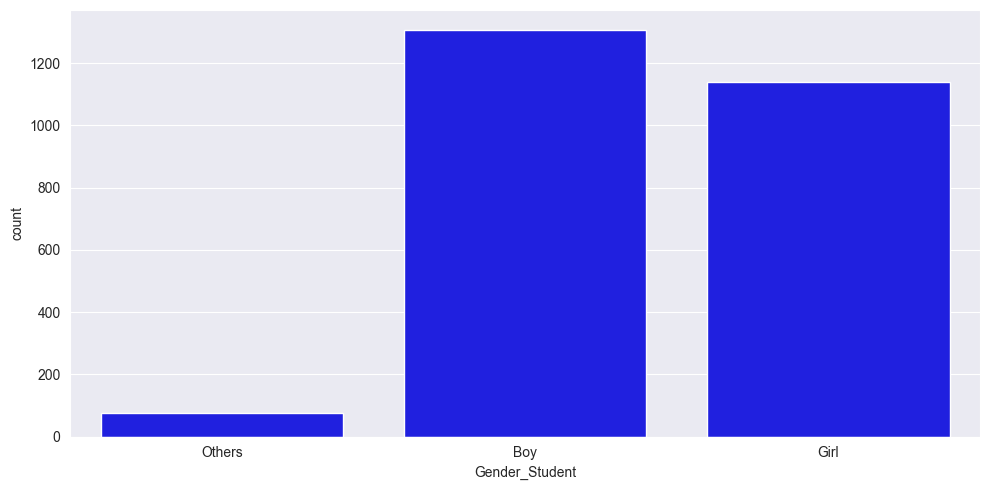

In [153]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=like_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.2.2.1.1 Percentage of boys who like learning science

In [154]:
utils.getPercentageByGender(like_science,df,"Boy")

0.6789802289281998


##### 5.2.2.1.2 Percentage of girls who like learning science

In [155]:
utils.getPercentageByGender(like_science,df,"Girl")

0.6188145731375748


#### 5.2.2.2 Gender wise distriibution of students, who do not like Science

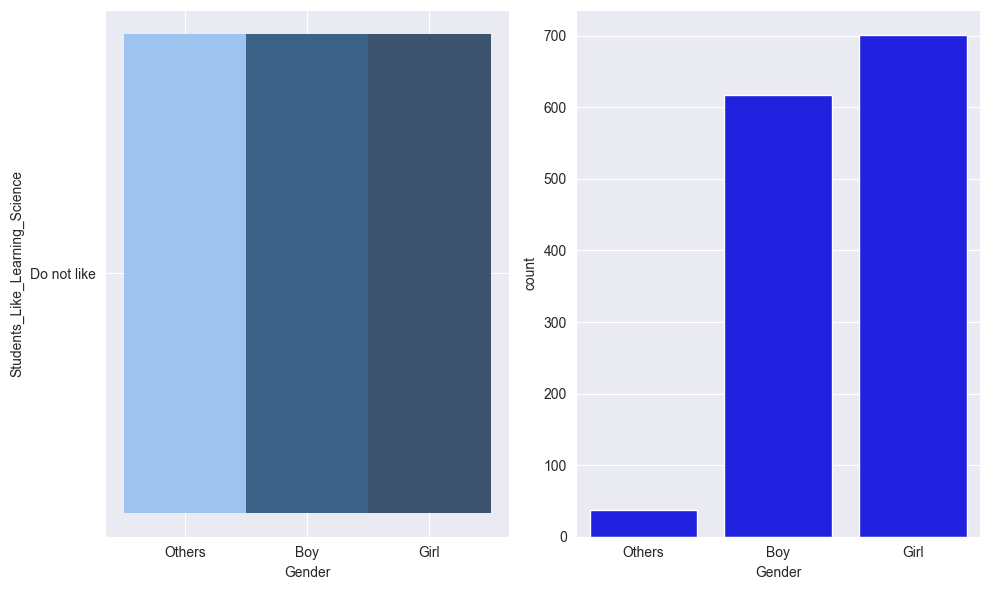

,count,unique,top,freq
Gender_Student,,,,
Others,68,1,Others,68
Boy,1035,1,Boy,1035
Girl,1116,1,Girl,1116


In [156]:
dont_like_science, math_grouped = utils.subjectLikeness(df,"Science", "Do not")
gender_groped.describe()


##### 5.2.2.2.1 Percentage of boys don't like learning science

In [157]:
utils.getPercentageByGender(dont_like_maths,df,"Boy")

0.5385015608740895



##### 5.2.2.2.2 Percentage of girls don't like learning science

In [158]:
utils.getPercentageByGender(dont_like_maths,df,"Girl")

0.6068515497553018


## 5.3 Confidence and Gender

In [159]:
subject_confidence_mask = df.columns.str.contains("Confident")
df[df.columns[subject_confidence_mask]].value_counts()

Students_Confident_in_Mathematics  Students_Confident_in_Science
Not Confident in Mathematics       Not Confident in Science         1030
                                   Somewhat Confident in Science     712
Somewhat Confident in Mathematics  Somewhat Confident in Science     673
                                   Not Confident in Science          502
                                   Very Confident in Science         248
Very Confident in Mathematics      Very Confident in Science         221
                                   Somewhat Confident in Science     196
Not Confident in Mathematics       Very Confident in Science         168
Very Confident in Mathematics      Not Confident in Science          125
Name: count, dtype: int64

In [160]:
df["Students_Confident_in_Mathematics"] = df["Students_Confident_in_Mathematics"].apply(lambda x: "Not Confident" if "Not" in str(x) else x )
df["Students_Confident_in_Mathematics"] = df["Students_Confident_in_Mathematics"].apply(lambda x: "Some what confident" if "Somewhat" in str(x) else x )
df["Students_Confident_in_Mathematics"] = df["Students_Confident_in_Mathematics"].apply(lambda x: "Very confident" if "Very" in str(x) else x )
df["Students_Confident_in_Mathematics"].value_counts()



Students_Confident_in_Mathematics
Not Confident          1910
Some what confident    1423
Very confident          542
Name: count, dtype: int64

In [161]:
df["Students_Confident_in_Science"] = df["Students_Confident_in_Science"].apply(lambda x: "Not Confident" if "Not" in str(x) else x )
df["Students_Confident_in_Science"] = df["Students_Confident_in_Science"].apply(lambda x: "Some what confident" if "Somewhat" in str(x) else x )
df["Students_Confident_in_Science"] = df["Students_Confident_in_Science"].apply(lambda x: "Very confident" if "Very" in str(x) else x )
df["Students_Confident_in_Science"].value_counts()



Students_Confident_in_Science
Not Confident          1657
Some what confident    1581
Very confident          637
Name: count, dtype: int64

### 5.3.1 Gender and Confidence in Mathematics

#### 5.3.1.1 Gender wise distribution of students are confident Mathematics

In [162]:
ver_much_like = df["Students_Confident_in_Mathematics"].str.contains("Very")
some_what_like = df["Students_Confident_in_Mathematics"].str.contains("Some")
confident_in_maths  = df[ver_much_like | some_what_like]
confident_in_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,56,1,Others,56
Boy,1068,1,Boy,1068
Girl,841,1,Girl,841


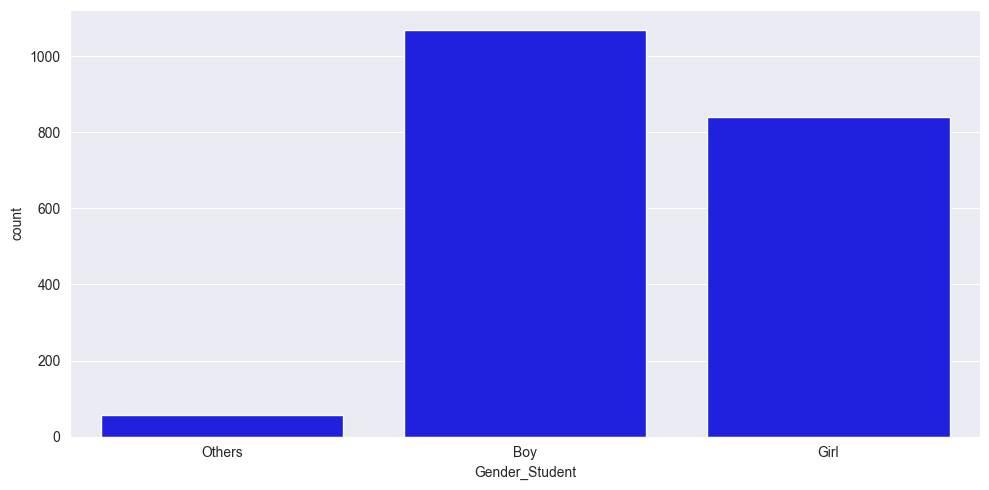

In [163]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=confident_in_maths, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()

##### 5.3.1.1.1 Percentage of boys, who are confident in mathematics

In [164]:
utils.getPercentageByGender(confident_in_maths,df,"Boy")

0.5556711758584808


##### 5.3.1.1.2 Percentage of girls, who are confident in mathematics

In [165]:
utils.getPercentageByGender(confident_in_maths,df,"Girl")

0.4573137574768896


#### 5.3.1.2 Gender wise distribution of students who are not confident in Mathematics

In [166]:
not_confident = df["Students_Confident_in_Mathematics"].str.contains("Not")
not_confident_in_maths  = df[not_confident]
not_confident_in_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,58,1,Others,58
Boy,854,1,Boy,854
Girl,998,1,Girl,998


##### 5.3.1.2.1 Percentage of boys, who are not confident mathematics

In [167]:
utils.getPercentageByGender(not_confident_in_maths,df,"Boy")

0.44432882414151925


##### 5.3.1.2.2 Percentage of girls, who are not confident in mathematics

In [168]:
utils.getPercentageByGender(not_confident_in_maths,df,"Girl")

0.5426862425231104


### 5.3.2 Gender and Confidence in Science

#### 5.3.2.1 Gender wise distriibution of students who like Science

In [169]:
ver_much_like = df["Students_Confident_in_Science"].str.contains("Very")
some_what_like = df["Students_Confident_in_Science"].str.contains("Some")
confident_in_science  = df[ver_much_like | some_what_like]
confident_in_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,69,1,Others,69
Boy,1187,1,Boy,1187
Girl,962,1,Girl,962


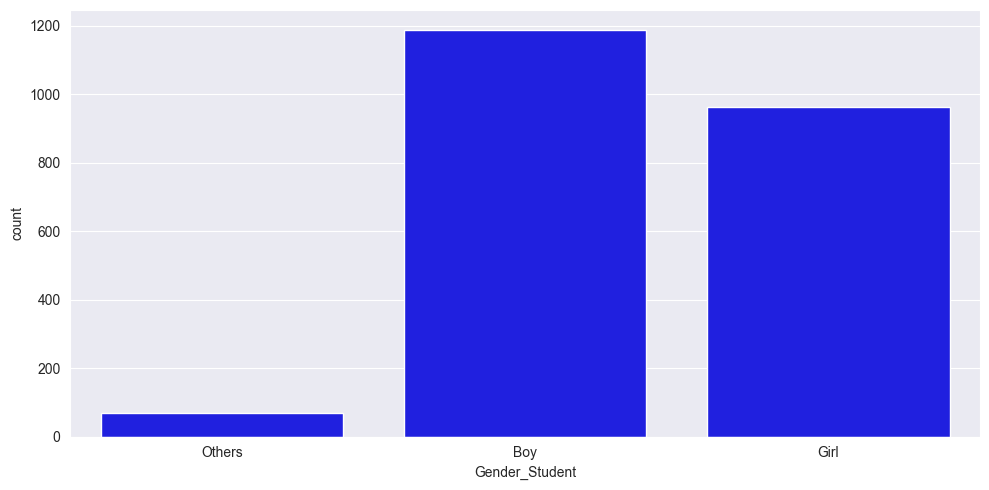

In [170]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=confident_in_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.3.2.1.1 Percentage of boys who like learning science

In [171]:
utils.getPercentageByGender(confident_in_science,df,"Boy")

0.617585848074922


##### 5.3.2.1.2 Percentage of girls who like learning science

In [172]:
utils.getPercentageByGender(confident_in_science,df,"Girl")

0.523110386079391


#### 5.3.2.2 Gender wise distriibution of students, who are not confident in Science

In [173]:
not_confident = df["Students_Confident_in_Science"].str.contains("Not")
not_confident_in_science  = df[not_confident]
not_confident_in_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,45,1,Others,45
Boy,735,1,Boy,735
Girl,877,1,Girl,877


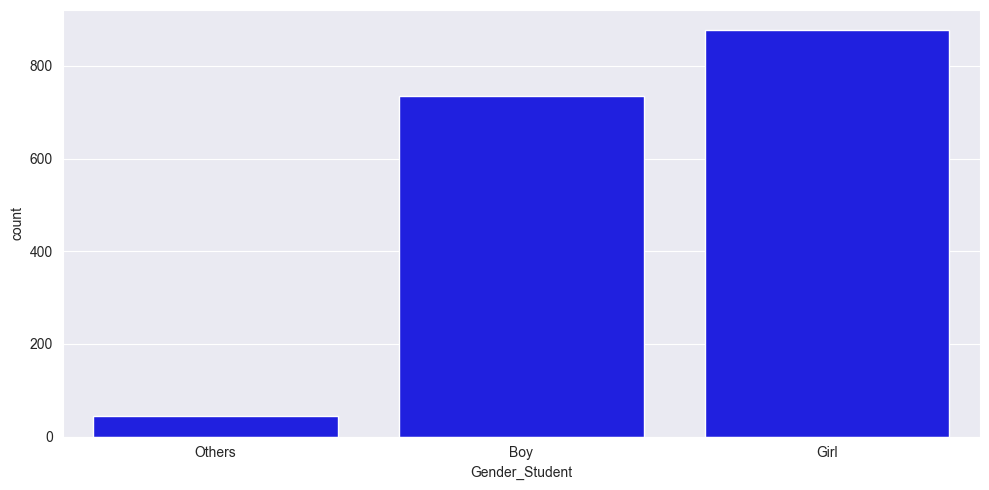

In [174]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=not_confident_in_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.3.2.2.1 Percentage of boys not confident in science

In [175]:
utils.getPercentageByGender(not_confident_in_science,df,"Boy")

0.38241415192507805



##### 5.2.2.2.2 Percentage of girls don't like learning science

In [176]:
utils.getPercentageByGender(not_confident_in_science,df,"Girl")

0.476889613920609


## 5.4 Subject Clarity  and Gender

In [177]:
clarity_mask = df.columns.str.contains("Clarity")
df[df.columns[clarity_mask]].value_counts()

Instructional_Clarity_in_Mathematics_Lessons  Instructional_Clarity_in_Science_Lessons
High Clarity of Instruction                   High Clarity of Instruction                 920
Moderate Clarity of Instruction               Moderate Clarity of Instruction             641
                                              High Clarity of Instruction                 502
High Clarity of Instruction                   Moderate Clarity of Instruction             480
Low Clarity of Instruction                    High Clarity of Instruction                 311
                                              Moderate Clarity of Instruction             285
Moderate Clarity of Instruction               Low Clarity of Instruction                  257
High Clarity of Instruction                   Low Clarity of Instruction                  252
Low Clarity of Instruction                    Low Clarity of Instruction                  227
Name: count, dtype: int64

In [178]:
df["Instructional_Clarity_in_Mathematics_Lessons"] = df["Instructional_Clarity_in_Mathematics_Lessons"].apply(lambda x: "High" if "High" in str(x) else x )
df["Instructional_Clarity_in_Mathematics_Lessons"] = df["Instructional_Clarity_in_Mathematics_Lessons"].apply(lambda x: "Moderate" if "Moderate" in str(x) else x )
df["Instructional_Clarity_in_Mathematics_Lessons"] = df["Instructional_Clarity_in_Mathematics_Lessons"].apply(lambda x: "Low" if "Low" in str(x) else x )
df["Instructional_Clarity_in_Mathematics_Lessons"].value_counts()



Instructional_Clarity_in_Mathematics_Lessons
High        1652
Moderate    1400
Low          823
Name: count, dtype: int64

In [179]:
df["Instructional_Clarity_in_Science_Lessons"] = df["Instructional_Clarity_in_Science_Lessons"].apply(lambda x: "High" if "High" in str(x) else x )
df["Instructional_Clarity_in_Science_Lessons"] = df["Instructional_Clarity_in_Science_Lessons"].apply(lambda x: "Moderate" if "Moderate" in str(x) else x )
df["Instructional_Clarity_in_Science_Lessons"] = df["Instructional_Clarity_in_Science_Lessons"].apply(lambda x: "Low" if "Low" in str(x) else x )
df["Instructional_Clarity_in_Science_Lessons"].value_counts()



Instructional_Clarity_in_Science_Lessons
High        1733
Moderate    1406
Low          736
Name: count, dtype: int64

### 5.4.1 Gender and Clarity in Mathematics

#### 5.4.1.1 Gender wise distribution of students with clarity in Mathmatics Lessons


In [180]:
high_clarity = df["Instructional_Clarity_in_Mathematics_Lessons"].str.contains("High")
moderate_clarity = df["Instructional_Clarity_in_Mathematics_Lessons"].str.contains("Moderate")
clarity_in_maths  = df[high_clarity | moderate_clarity]
clarity_in_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,82,1,Others,82
Boy,1577,1,Boy,1577
Girl,1393,1,Girl,1393


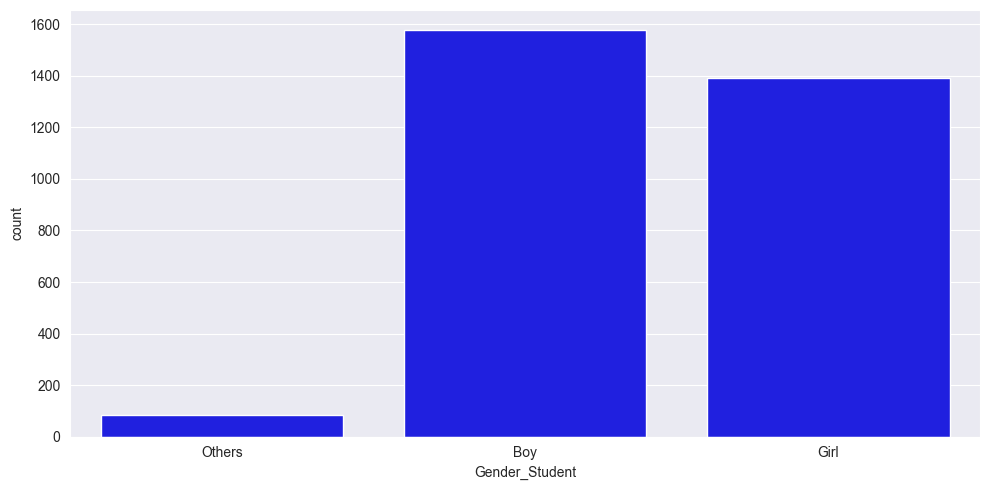

In [181]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=clarity_in_maths, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()

##### 5.4.1.1.1 Percentage of boys, who are confident in mathematics

In [182]:
utils.getPercentageByGender(clarity_in_maths,df,"Boy")

0.8204994797086368


##### 5.3.1.1.2 Percentage of girls, who are confident in mathematics

In [183]:
utils.getPercentageByGender(clarity_in_maths,df,"Girl")

0.7574768896139206


#### 5.4.1.2 Gender wise distribution of students who do not have clarity in Mathematics

In [184]:
no_clarity = df["Instructional_Clarity_in_Mathematics_Lessons"].str.contains("Low")
not_clear_in_maths  = df[no_clarity]
not_clear_in_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,32,1,Others,32
Boy,345,1,Boy,345
Girl,446,1,Girl,446


##### 5.4.1.2.1 Percentage of boys, who are not confident mathematics

In [185]:
utils.getPercentageByGender(not_clear_in_maths,df,"Boy")

0.17950052029136315


##### 5.4.1.2.2 Percentage of girls, who are not confident in mathematics

In [186]:
utils.getPercentageByGender(not_clear_in_maths,df,"Girl")

0.2425231103860794


### 5.4.2 Gender and Likeness for Science

#### 5.4.2.1 Gender wise distriibution of students who like Science

In [187]:
ver_much_clear = df["Instructional_Clarity_in_Science_Lessons"].str.contains("High")
some_what_clear = df["Instructional_Clarity_in_Science_Lessons"].str.contains("Moderate")
clear_in_science  = df[ver_much_clear | some_what_clear]
clear_in_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,87,1,Others,87
Boy,1610,1,Boy,1610
Girl,1442,1,Girl,1442


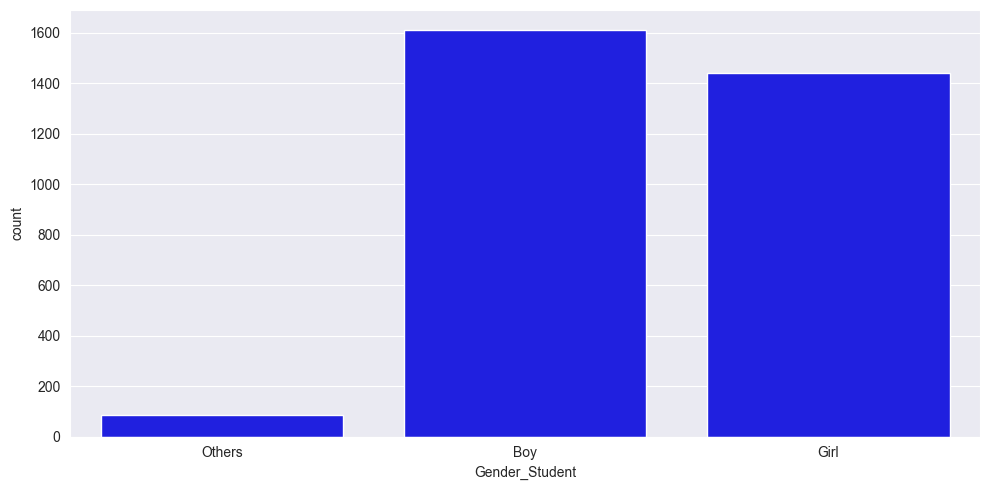

In [188]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=clear_in_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.4.2.1.1 Percentage of boys who like learning science

In [189]:
utils.getPercentageByGender(clear_in_science,df,"Boy")

0.8376690946930281


##### 5.4.2.1.2 Percentage of girls who like learning science

In [190]:
utils.getPercentageByGender(clear_in_science,df,"Girl")

0.7841218053289831


#### 5.4.2.2 Gender wise distriibution of students, who are not confident in Science

In [191]:
not_clear_in_science_mask = df["Students_Confident_in_Science"].str.contains("Not")
not_clear_in_science  = df[not_clear_in_science_mask]
not_clear_in_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,45,1,Others,45
Boy,735,1,Boy,735
Girl,877,1,Girl,877


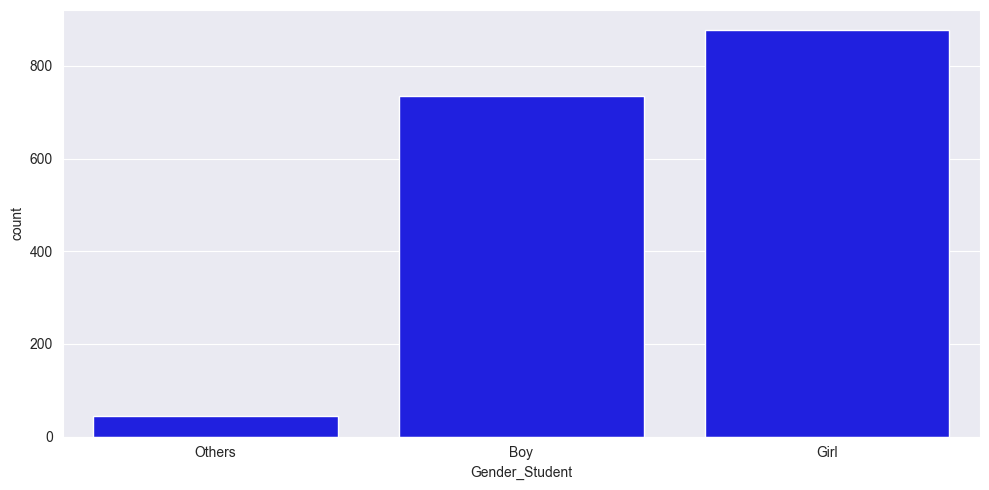

In [192]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=not_clear_in_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.4.2.2.1 Percentage of boys not confident in science

In [193]:
utils.getPercentageByGender(not_clear_in_science,df,"Boy")

0.38241415192507805



##### 5.3.2.2.2 Percentage of girls don't like learning science

In [194]:
utils.getPercentageByGender(not_clear_in_science,df,"Girl")

0.476889613920609


## 5.5 Value for Subject, and Environmental Preservation and Gender

In [195]:
value_mask = df.columns.str.contains("Value")
print(df[df.columns[value_mask]].value_counts())

Students_Value_Mathematics  Students_Value_Science  Students_Value_Environmental_Preservation
Somewhat Value Mathematics  Somewhat Value Science  Strongly Value                               405
                                                    Very Strongly Value                          403
Do Not Value Mathematics    Do Not Value Science    Strongly Value                               316
Somewhat Value Mathematics  Do Not Value Science    Strongly Value                               305
Strongly Value Mathematics  Strongly Value Science  Very Strongly Value                          296
Do Not Value Mathematics    Do Not Value Science    Very Strongly Value                          258
Somewhat Value Mathematics  Strongly Value Science  Very Strongly Value                          203
                            Do Not Value Science    Very Strongly Value                          188
Strongly Value Mathematics  Somewhat Value Science  Very Strongly Value                          1

In [196]:
df["Students_Value_Science"] = df["Students_Value_Science"].apply(lambda x: "Strongly value" if "Strongly" in str(x) else x )
df["Students_Value_Science"] = df["Students_Value_Science"].apply(lambda x: "Do not value" if "Do not" in str(x) else x )
df["Students_Value_Science"] = df["Students_Value_Science"].apply(lambda x: "Somewhat value" if "Somewhat" in str(x) else x )
print(df["Students_Value_Science"].value_counts())



Students_Value_Science
Do Not Value Science    1493
Somewhat value          1490
Strongly value           892
Name: count, dtype: int64


In [197]:
df["Students_Value_Mathematics"] = df["Students_Value_Mathematics"].apply(lambda x: "Strongly value" if "Strongly" in str(x) else x )
df["Students_Value_Mathematics"] = df["Students_Value_Mathematics"].apply(lambda x: "Do not value" if "Do not" in str(x) else x )
df["Students_Value_Mathematics"] = df["Students_Value_Mathematics"].apply(lambda x: "Somewhat value" if "Somewhat" in str(x) else x )
print(df["Students_Value_Mathematics"].value_counts())



Students_Value_Mathematics
Somewhat value              1792
Do Not Value Mathematics    1063
Strongly value              1020
Name: count, dtype: int64


In [198]:
df["Students_Value_Environmental_Preservation"] = df["Students_Value_Environmental_Preservation"].apply(lambda x: "Strongly value" if "Strongly" in str(x) else x )
df["Students_Value_Environmental_Preservation"] = df["Students_Value_Environmental_Preservation"].apply(lambda x: "Do not value" if "Do not" in str(x) else x )
df["Students_Value_Environmental_Preservation"] = df["Students_Value_Environmental_Preservation"].apply(lambda x: "Somewhat value" if "Somewhat" in str(x) else x )
print(df["Students_Value_Environmental_Preservation"].value_counts())



Students_Value_Environmental_Preservation
Strongly value    3438
Somewhat value     437
Name: count, dtype: int64


### 5.5.1 Gender and Value for Mathematics

#### 5.5.1.1 Gender wise distribution of students, who value Mathematics

In [199]:
strong_value = df["Students_Value_Mathematics"].str.contains("Strongly")
some_what_value = df["Students_Value_Mathematics"].str.contains("Somewhat")
value_for_maths  = df[strong_value | some_what_value]
value_for_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,77,1,Others,77
Boy,1412,1,Boy,1412
Girl,1323,1,Girl,1323


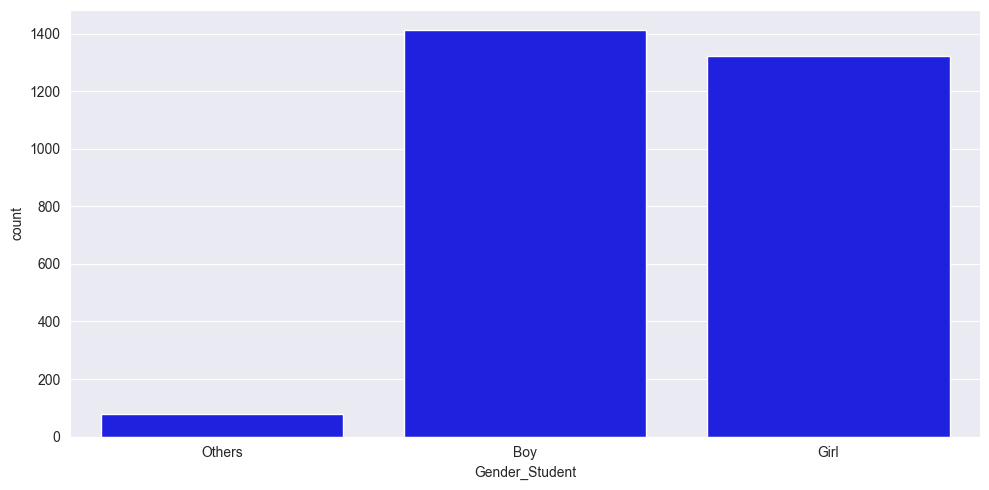

In [200]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=value_for_maths, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()

##### 5.5.1.1.1 Percentage of boys, who are confident in mathematics

In [201]:
utils.getPercentageByGender(value_for_maths,df,"Boy")

0.7346514047866806


##### 5.5.1.1.2 Percentage of girls, who are confident in mathematics

In [202]:
utils.getPercentageByGender(value_for_maths,df,"Girl")

0.7194127243066885


#### 5.5.1.2 Gender wise distribution of students who do not have clarity in Mathematics

In [203]:
no_value_maths = df["Students_Value_Mathematics"].str.contains("Do Not")
do_not_value_maths  = df[no_value_maths]
do_not_value_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,37,1,Others,37
Boy,510,1,Boy,510
Girl,516,1,Girl,516


##### 5.5.1.2.1 Percentage of boys, who are not confident mathematics

In [204]:
utils.getPercentageByGender(do_not_value_maths,df,"Boy")

0.26534859521331944


##### 5.5.1.2.2 Percentage of girls, who are not confident in mathematics

In [205]:
utils.getPercentageByGender(do_not_value_maths,df,"Girl")

0.2805872756933116


### 5.5.2 Gender and Value for Science

#### 5.5.2.1 Gender wise distriibution of students who value Science

In [206]:
strong_value = df["Students_Value_Science"].str.contains("Strongly")
moderate_value = df["Students_Value_Science"].str.contains("Moderate")
value_for_science  = df[strong_value | moderate_value]
value_for_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,31,1,Others,31
Boy,395,1,Boy,395
Girl,466,1,Girl,466


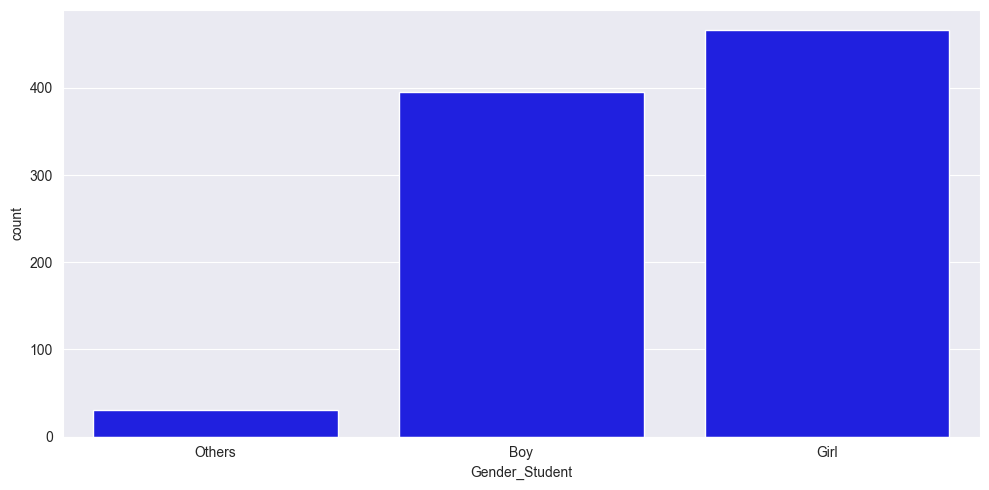

In [207]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=value_for_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.5.2.1.1 Percentage of boys who value science

In [208]:
utils.getPercentageByGender(value_for_science,df,"Boy")

0.20551508844953173


##### 5.5.2.1.2 Percentage of girls who value  science

In [209]:

utils.getPercentageByGender(value_for_science,df,"Girl")

0.25339858618814576


#### 5.5.2.2 Gender wise distriibution of students, who do not value Science

In [210]:
dont_value_science_mask = df["Students_Value_Science"].str.contains("Do Not")
dont_value_science  = df[dont_value_science_mask]
dont_value_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,40,1,Others,40
Boy,781,1,Boy,781
Girl,672,1,Girl,672


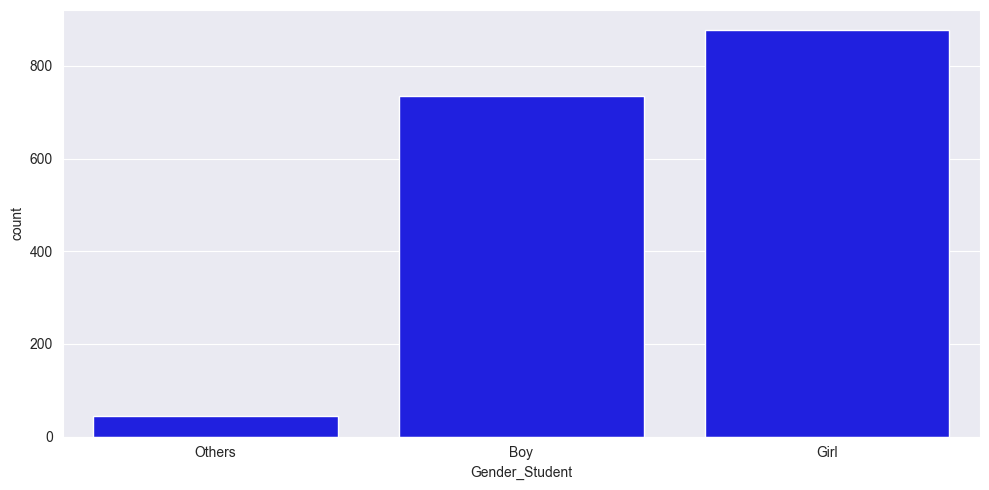

In [211]:

fig = plt.figure(figsize=(10,5))
sns.countplot(data=not_clear_in_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.4.2.2.1 Percentage of boys not confident in science

In [212]:
utils.getPercentageByGender(dont_value_science,df,"Boy")

0.40634755463059313



##### 5.3.2.2.2 Percentage of girls don't like learning science

In [213]:
utils.getPercentageByGender(dont_value_science,df,"Girl")

0.36541598694942906


### 5.5.3 Gender and Value for Environmental Preservation

#### 5.5.2.1 Gender wise distriibution of students who value Environmental Preservation

In [214]:
strong_value = df["Students_Value_Environmental_Preservation"].str.contains("Strongly")
moderate_value = df["Students_Value_Environmental_Preservation"].str.contains("Moderate")
value_for_ep  = df[strong_value | moderate_value]
value_for_ep.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,91,1,Others,91
Boy,1623,1,Boy,1623
Girl,1724,1,Girl,1724


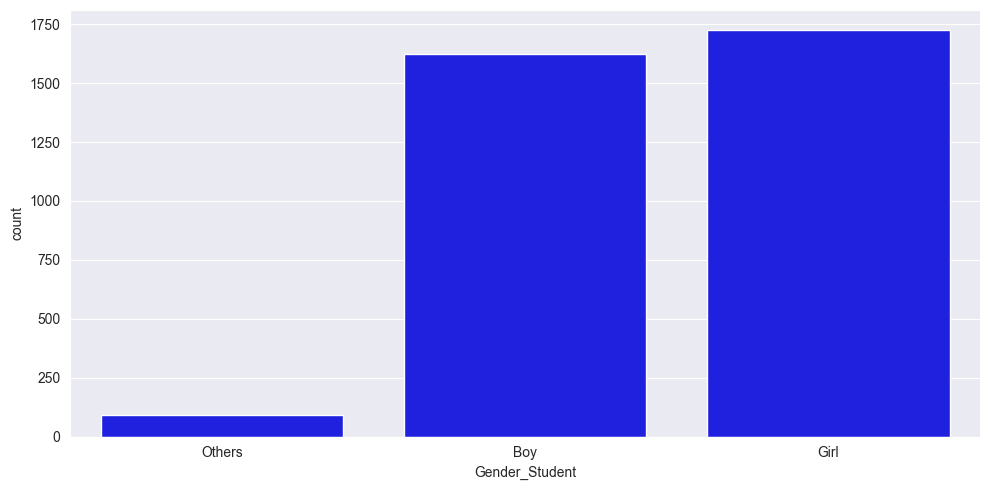

In [215]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=value_for_ep, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.5.3.1.1 Percentage of boys who value Environment Preservation

In [216]:
utils.getPercentageByGender(value_for_ep,df,"Boy")

0.8444328824141519


##### 5.5.2.1.2 Percentage of girls who value Environmental Preservation

In [217]:
utils.getPercentageByGender(value_for_ep,df,"Girl")

0.9374660141381186


#### 5.5.3.2 Gender wise distriibution of students, who do not value SEnvironemntal Preservation

In [218]:
dont_value_ep_stu = df["Students_Value_Science"].str.contains("Do Not")
dont_value_ep  = df[dont_value_ep_stu]
dont_value_ep.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,40,1,Others,40
Boy,781,1,Boy,781
Girl,672,1,Girl,672


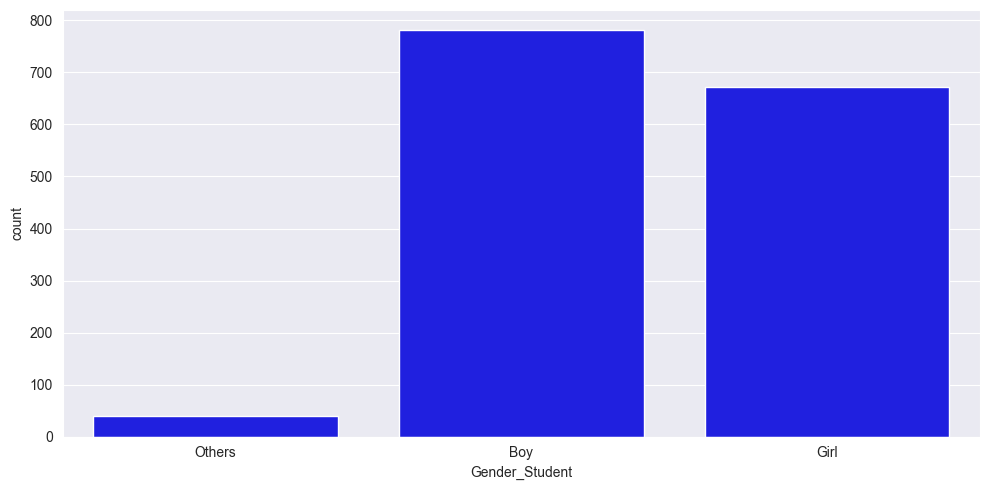

In [219]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=dont_value_ep, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.4.2.2.1 Percentage of boys, who dont value Environmental Preservation

In [220]:
utils.getPercentageByGender(dont_value_ep,df,"Boy")

0.40634755463059313



##### 5.3.2.2.2 Percentage of girls don't like learning science

In [221]:
utils.getPercentageByGender(dont_value_ep,df,"Girl")

0.36541598694942906


## 5.6 Gender and Bullying

In [222]:
df.info()

df.to_feather("./data/cleaned_behavior.feather")

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 5089
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Gender_Student                                3875 non-null   category
 1   Lang_Spoken_Home                              3875 non-null   category
 2   Books_Home                                    3875 non-null   category
 3   Own_Computer                                  3875 non-null   category
 4   Shared_Computer                               3875 non-null   category
 5   Smartphone                                    3875 non-null   category
 6   Internet_Access                               3875 non-null   category
 7   Study_Desk                                    3875 non-null   category
 8   Own_Room                                      3875 non-null   category
 9   ParentA_Edu_Level                             3875 non-nu